In [1]:
from google.colab import drive

In [2]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout

In [3]:
import numpy as np
import pandas as pd
import cv2
import os

In [4]:
drive.mount('/content/drive')#connect drive to colab

Mounted at /content/drive


#Extracting Dataset

In [5]:
Datadir='/content/drive/MyDrive/DataSetDodCat/PetImages'
category=["Dog","Cat"]
dataset=[]
size=50
ct=0;
ct1=0
for types in category:
    path=os.path.join(Datadir,types)
    ex=0
    for img in os.listdir(path):
        if types=='Dog':
            ex=1
            ct=ct+1;
        else :
            ct1=ct1+1;
            ex=0
        try :
            img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img=cv2.resize(img_arr ,(size,size),interpolation=cv2.INTER_AREA)
            dataset.append([new_img,ex])
        except Exception as e:
            pass

In [6]:
import random

In [7]:
random.shuffle(dataset)

In [8]:
X=[]
Y=[]
for features,label in dataset:
  X.append(features)
  Y.append(label)

In [159]:
X=np.array(X).reshape(-1,size,size,1)

In [160]:
X=X/225

# Neural Network

In [129]:
model=Sequential()
model.add(Flatten(input_shape=(50,50)))
model.add(BatchNormalization(axis=1))
model.add(Dense(158,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [130]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 2500)              0         
                                                                 
 batch_normalization_11 (Bat  (None, 2500)             10000     
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 158)               395158    
                                                                 
 dense_19 (Dense)            (None, 2)                 318       
                                                                 
Total params: 405,476
Trainable params: 400,476
Non-trainable params: 5,000
_________________________________________________________________


In [140]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) #learnig rate is by default 0.001 of adam optimizer

# callbacks

In [132]:

from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
filepath="/content/drive/MyDrive/saved_models/CatvsDog-{epoch:02d}-{val_accuracy:.2f}.hdf5"

# save the model with the best validation (development) accuracy till now
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#
earlystopping = EarlyStopping(monitor='val_loss',patience=8,verbose=1)

logcsv = CSVLogger('mycsvcatvsdog',separator=',',append=False)

callback_list=[checkpoint,earlystopping,logcsv]

#Training 

In [141]:
history=model.fit(X_train,y_train,epochs=3,validation_split=0.2,callbacks=callback_list)

Epoch 1/3
458/462 [============================>.] - ETA: 0s - loss: 0.5042 - accuracy: 0.7570
Epoch 1: val_accuracy did not improve from 0.64475
462/462 [==============================] - 6s 12ms/step - loss: 0.5047 - accuracy: 0.7568 - val_loss: 0.7073 - val_accuracy: 0.6415
Epoch 2/3
458/462 [============================>.] - ETA: 0s - loss: 0.4745 - accuracy: 0.7774
Epoch 2: val_accuracy improved from 0.64475 to 0.64827, saving model to /content/drive/MyDrive/saved_models/CatvsDog-02-0.65.hdf5
462/462 [==============================] - 6s 12ms/step - loss: 0.4744 - accuracy: 0.7773 - val_loss: 0.7483 - val_accuracy: 0.6483
Epoch 3/3
461/462 [============================>.] - ETA: 0s - loss: 0.4479 - accuracy: 0.7936
Epoch 3: val_accuracy did not improve from 0.64827
462/462 [==============================] - 5s 11ms/step - loss: 0.4477 - accuracy: 0.7935 - val_loss: 0.7826 - val_accuracy: 0.6366


predictions

In [153]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

In [154]:
import matplotlib.pyplot as plt

In [155]:
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7748430396189652

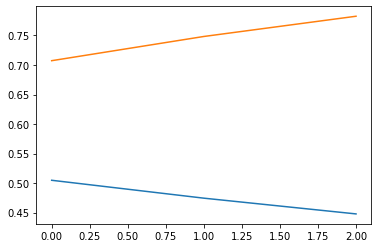

In [156]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

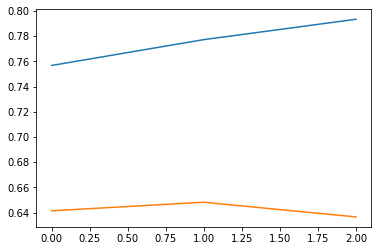

In [157]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

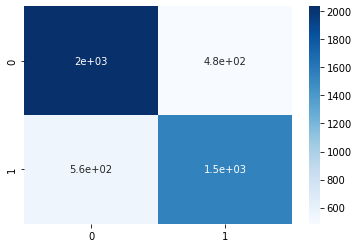

In [158]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')